# Import multiple image files to tensorflow.

This script was run using tensorflow version r1.4

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import os

Create an empty list to collect numpy image arrays

In [2]:
img = []

Define the directory that contains the image files you wish to import.  Here I use the "*" wildcard to indicate that all jpeg files within the defined folder are to be imported.

In [3]:
file_num = len(os.listdir(r"C:\Users\<yourname>\Pictures\Dog"))
filenames = [r"C:\Users\<yourname>\Pictures\Dog\*.jpg"]

I have placed all my image files in a specific folder entitled 'Dog'. Each image file is a .jpeg, but small changes to the following code can be used to accomidate other image formats. (Note: I only have image files in this directory allowing me to define file_num which will be used later)

## Create TensorFlow graph

In [4]:
filename_queue = tf.train.string_input_producer(tf.train.match_filenames_once(filenames), num_epochs=1, shuffle=False)

The filename_queue variable will be used to point to all files that we want to import.  The call to tf.train.string_input_producer() will contain three arguments.  The first is used to identify the files we are importing, num_epochs=1 indicates that each image file will only be called upon once, and shuffle=False indicates that files will be imported sequentially from their home directory.  

In [5]:
image_reader = tf.WholeFileReader()
_, image_file = image_reader.read(filename_queue)
image = tf.image.decode_jpeg(image_file, channels=1)

The tf.WholeFileReader() class contains the read module that is used to import individual image files.  The first output of image_reader.read is the image filename, the second output are image values.  The tf.image.decode_jpeg returns a tensor with the shape [hight, width, channels].  The default channels setting of 0 returns the number of channels in the original .jpeg while channels=1 returns a grayscale image. 

In [6]:
resized_image = tf.image.resize_images(image, [227, 227])

tf.image.resize_images() is used to alter the dimensions of the images we are importing.  The images I am working with have variable hight and width dimensions.  To ensure that the dimensions of each image are the same I will resize them to be 227x227 before performing downstream processing.  

## Begin Session

In [7]:
with tf.Session() as sess:
      
    tf.local_variables_initializer().run()
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(coord=coord)
    
    while True:
        try: 
            for file in range(file_num):
                image_tensor = sess.run([resized_image])
                img.append(image_tensor[0])    

        except tf.errors.OutOfRangeError:
            
            coord.request_stop()
            coord.join(threads)
            break

Now that our graph is complete we are able to run the session.  Predefined variables are initialized, and tf.train.Coordininator() and tf.train.start_queue_runners() are used to manage the file_queue of images that we are working with.  Following the "try" statement we loop through each image that is imported as a numpy array and append this array to a list that will contain our images.

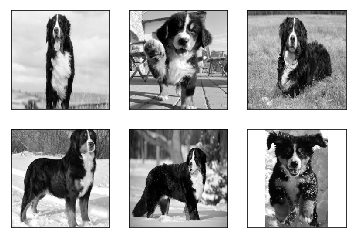

In [8]:
for i in range(file_num):
    plt.subplot(2, 3, i+1) 
    plt.imshow(img[i][:, :, 0], cmap='gray')
    plt.tick_params(labelbottom='off', labelleft='off', bottom='off', left='off')
plt.show()

Success! We have imported our images and resized them using tensorflow! 